In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks


#### qtn1

In [4]:
#clearly brings out the required analysis
df = pd.read_csv('GlobalTemperatures.csv')
df.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.isnull().sum()

dt                                              0
LandAverageTemperature                         12
LandAverageTemperatureUncertainty              12
LandMaxTemperature                           1200
LandMaxTemperatureUncertainty                1200
LandMinTemperature                           1200
LandMinTemperatureUncertainty                1200
LandAndOceanAverageTemperature               1200
LandAndOceanAverageTemperatureUncertainty    1200
dtype: int64

In [6]:
df_numercic = df.select_dtypes(include='number')


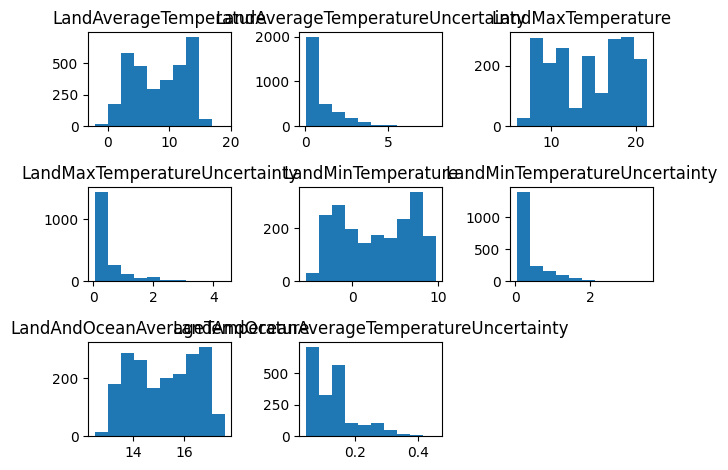

In [10]:
plt.Figure(figsize=(10,10))
for i, col in enumerate(df_numercic.columns):
    plt.subplot(3,3,i+1)
    plt.hist(df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [12]:
df['LandAverageTemperature'] = df['LandAverageTemperature'].fillna(df['LandAverageTemperature'].mean())
df['LandAverageTemperatureUncertainty'] = df['LandAverageTemperatureUncertainty'].fillna(df['LandAverageTemperatureUncertainty'].median())

In [13]:
df.isnull().sum()

dt                                              0
LandAverageTemperature                          0
LandAverageTemperatureUncertainty               0
LandMaxTemperature                           1200
LandMaxTemperatureUncertainty                1200
LandMinTemperature                           1200
LandMinTemperatureUncertainty                1200
LandAndOceanAverageTemperature               1200
LandAndOceanAverageTemperatureUncertainty    1200
dtype: int64

#### qtn2

In [14]:

df['dt'] = pd.to_datetime(df['dt'])
df.set_index('dt', inplace=True)
df

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
dt,,,,,,,,
1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057
2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058
2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062


#### qtn3

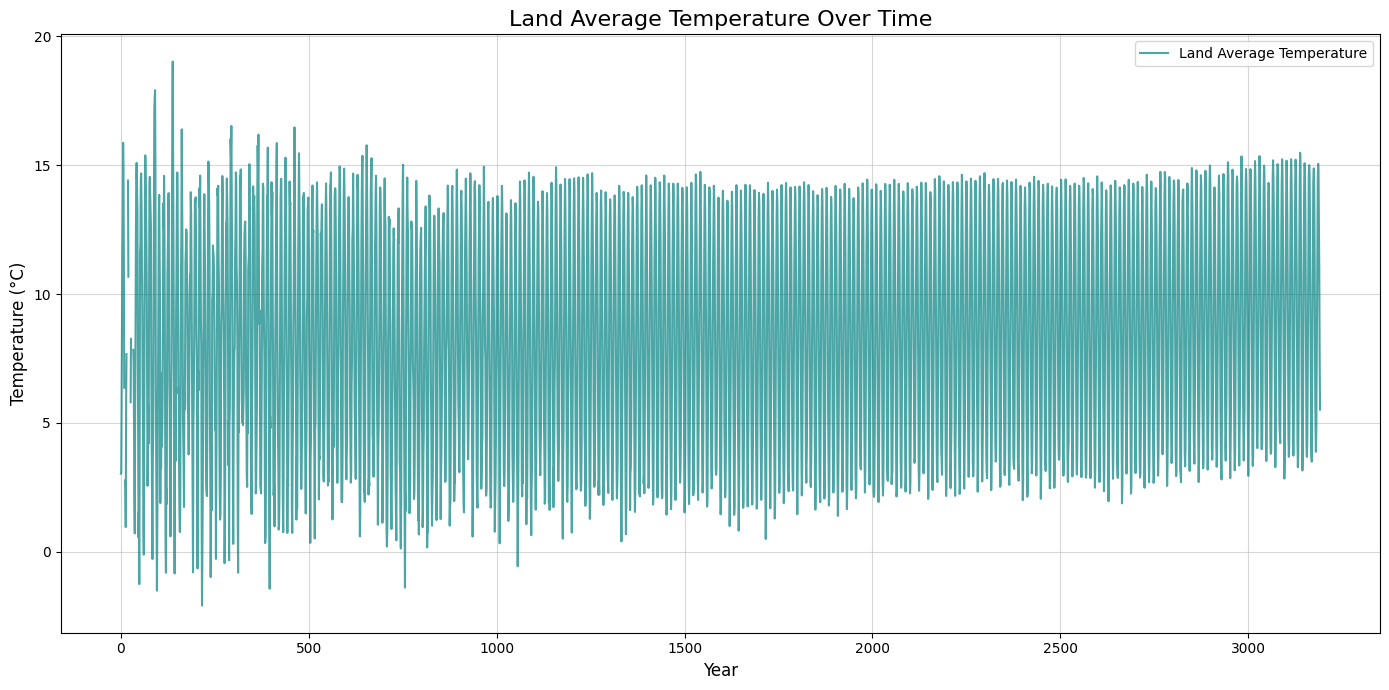

In [6]:

plt.figure(figsize=(14, 7))
plt.plot(df.index,df['LandAverageTemperature'], label='Land Average Temperature', color='teal', alpha=0.7)
plt.title('Land Average Temperature Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.grid(alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


#### qtn4

In [8]:
# Focus on the 'LandAverageTemperature' column
temperature_data = df['LandAverageTemperature']

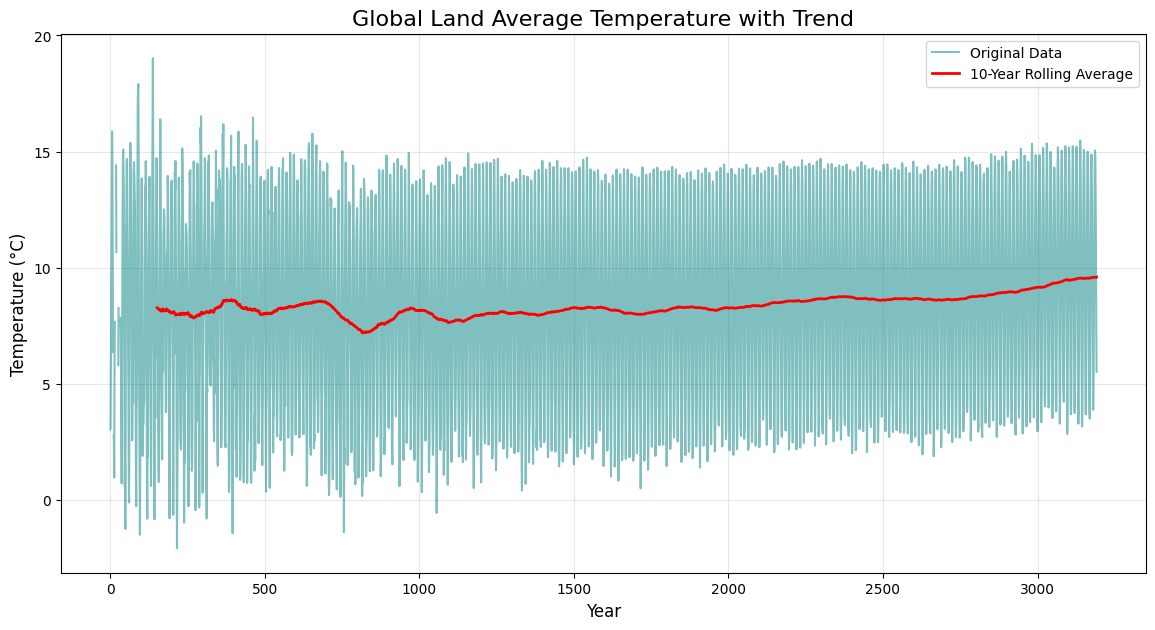

In [9]:
rolling_avg = temperature_data.rolling(window=120).mean()  

plt.figure(figsize=(14, 7))
plt.plot(temperature_data, label='Original Data',color = 'teal', alpha=0.5)
plt.plot(rolling_avg, label='10-Year Rolling Average', color='red', linewidth=2)
plt.title('Global Land Average Temperature with Trend', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.grid(alpha=0.3)
plt.legend()
plt.show()


In [18]:
temperature_data

dt
1750-01-01     3.034
1750-02-01     3.083
1750-03-01     5.626
1750-04-01     8.490
1750-05-01    11.573
               ...  
2015-08-01    14.755
2015-09-01    12.999
2015-10-01    10.801
2015-11-01     7.433
2015-12-01     5.518
Name: LandAverageTemperature, Length: 3192, dtype: float64

C:\Users\joyaw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


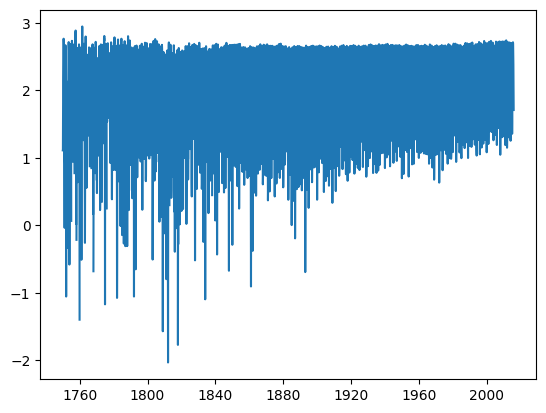

In [19]:
temperature_data_logscale = np.log(temperature_data)
plt.plot(temperature_data_logscale)

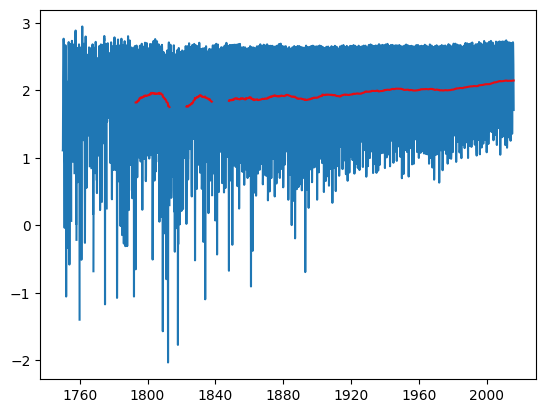

In [20]:
movingaverage = temperature_data_logscale.rolling(window=120).mean()
plt.plot(temperature_data_logscale)
plt.plot(movingaverage,color = 'red',alpha = .9)

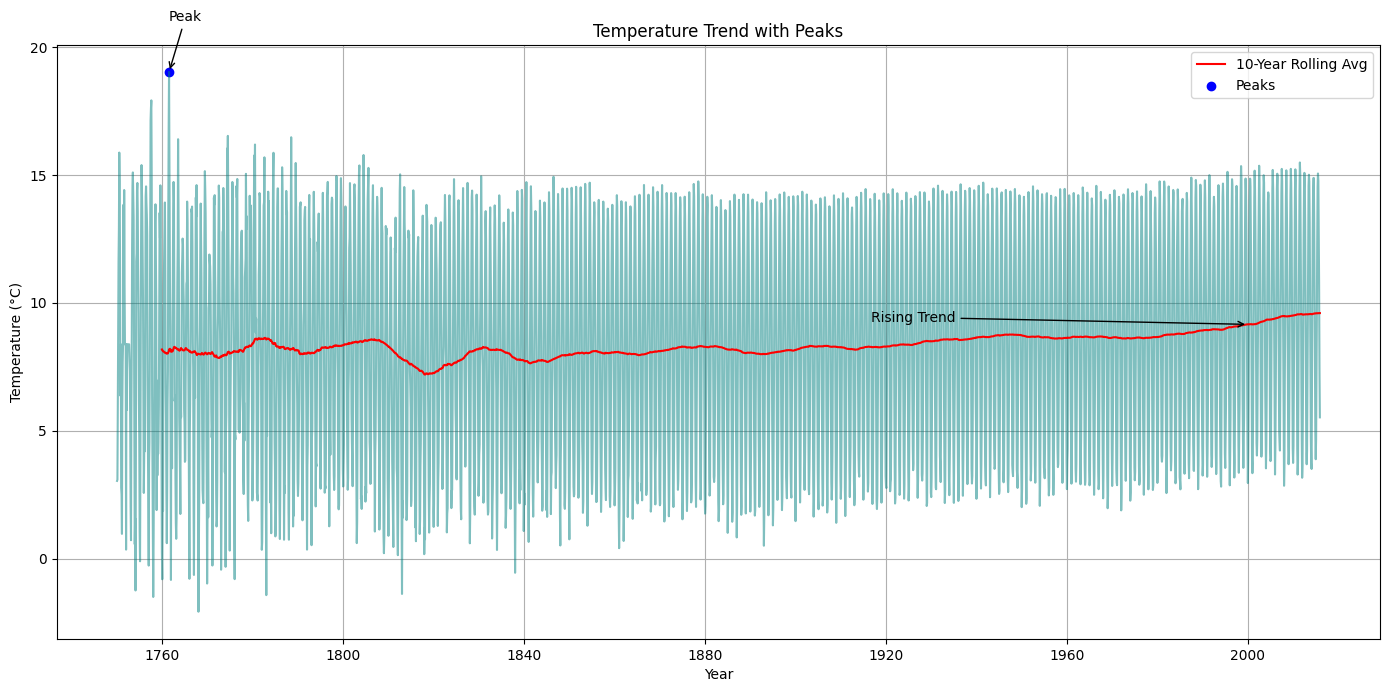

In [21]:

rolling_avg = temperature_data.rolling(120).mean()

peaks = find_peaks(temperature_data, distance=365 * 10)[0]

# Plot
plt.figure(figsize=(14, 7))
plt.plot(temperature_data, alpha=0.5, color='teal')
plt.plot(rolling_avg, color='red', label='10-Year Rolling Avg')
plt.scatter(temperature_data.index[peaks], temperature_data.iloc[peaks], color='blue', label='Peaks')

# Annotations
plt.annotate('Rising Trend', xy=(temperature_data.index[3000], rolling_avg.iloc[3000]), xytext=(temperature_data.index[2000], rolling_avg.iloc[2000] + 1), arrowprops=dict(facecolor='green', arrowstyle='->'))
plt.annotate('Peak', xy=(temperature_data.index[peaks[0]], temperature_data.iloc[peaks[0]]), xytext=(temperature_data.index[peaks[0]], temperature_data.iloc[peaks[0]] + 2), arrowprops=dict(facecolor='blue', arrowstyle='->'))

plt.title('Temperature Trend with Peaks')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


The above [Redline] shows a long term trend with a gradual increase and decrease over a period of time.And the peak value shown when them temperature is highest at a particular year